# Deep Learning Tutorial

## 0. Imports

In [99]:
from blpytorchlightning.dataset_components.datasets.PickledDataset import PickledDataset

import math
import random
import torch
import torchviz
import numpy as np
import pytorch_lightning as ptl
from matplotlib import pyplot as plt

from monai.networks.nets.unet import UNet

## 1. Background

## 2. Pytorch

## 3. MONAI / Creating Models

In [104]:
unet_spec = {
    "spatial_dims": 2,
    "in_channels": 1,
    "out_channels": 3,
    "channels": [8, 16, 32],
    "strides": [2,2]
}

unet = UNet(**unet_spec)

x = torch.zeros((1, 1, 128, 128))
y_hat = unet(x)

torchviz.make_dot(y_hat, params=dict(list(unet.named_parameters()))).render("unet_torchviz", format="png")

'unet_torchviz.png'

![unet_torchviz](unet_torchviz.png)

## 4. Data Preparation and Loading

Create a `PickledDataset` to load the data that I prepared ahead of time:

In [94]:
dataset = PickledDataset("data", transformer=)
print(f"There are {len(dataset)} images in the dataset.")

There are 201 images in the dataset.


The dataset is an iterable that will return a "sample" corresponding a given index. A sample can be anything in principle, it depends on how the dataset was written. In this case a `PickledDataset` was created explicitly for image segmentation, so it returns a `tuple` where the first element is the image and the second element is the mask:

In [95]:
sample = dataset[0]
print(sample[0].shape, sample[0].min(), sample[0].max())
print(sample[1].shape, sample[1].min(), sample[1].max())


(324, 360) -1.0576527889931138 1.0474470793424975
(324, 360) 0 2


The image has already been rescaled so the pixel values are approximately between -1 and 1 before the data was pickled. The images and masks ahve also been downscaled so that the model can be trained very quickly for demonstrative purposes.

The mask contains integer values; 0=cort, 1=trab, 2=background.

Plot some sample data:

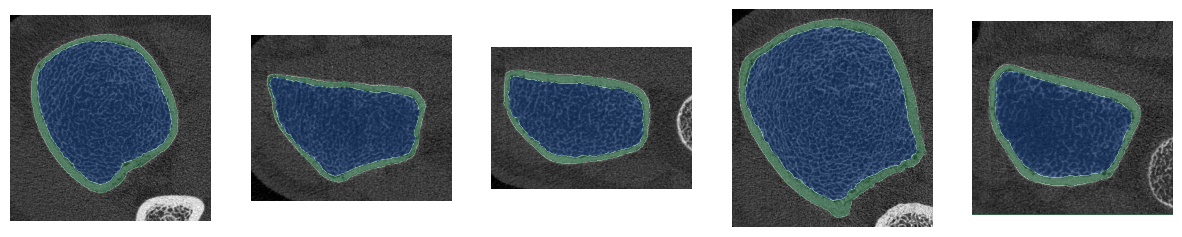

In [102]:
num_plots = 5
mask_opacity = 0.6

fig, axs = plt.subplots(1, num_plots, figsize=(3*num_plots,3))

for i, ax in enumerate(axs):
    img, mask = dataset[random.randint(0, len(dataset))]
    cort = mask==0
    trab = mask==1
    ax.imshow(img, cmap="gist_gray", vmin=-1, vmax=1)
    ax.imshow(cort, cmap="Greens", alpha=mask_opacity*cort.astype(float))
    ax.imshow(trab, cmap="Blues", alpha=mask_opacity*trab.astype(float))
    
    ax.axis("off")


plt.show()

To streamline the process of loading data when training a deep learning model, we use an object that in pytorch is called a `DataLoader`. A `DataLoader` will take care of things like sub-sampling, random shuffling, using multiple CPUs to load data in parallel, batching, etc. Here we want to split our data into 3 sub-sets: train/val/test. We will use `numpy` to randomly assign samples to each group and then create a `DataLoader` for each.

In [97]:
batch_size = 16

train_prop = 0.6
val_prop = 0.2

idxs = np.arange(0, len(dataset))
np.random.shuffle(idxs)

train_idxs = idxs[:math.floor(train_prop*len(dataset))]
val_idxs = idxs[math.floor(train_prop*len(dataset)):math.floor((val_prop+train_prop)*len(dataset))]
test_idxs = idxs[math.floor((val_prop+train_prop)*len(dataset)):]

print("train: ", train_idxs, "\n")
print("val: ", val_idxs, "\n")
print("test: ", test_idxs, "\n")

train_loader = torch.utils.data.DataLoader(
    torch.utils.data.Subset(dataset, train_idxs), 
    batch_size=batch_size, shuffle=True
)

val_loader = torch.utils.data.DataLoader(
    torch.utils.data.Subset(dataset, val_idxs), 
    batch_size=batch_size, shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    torch.utils.data.Subset(dataset, test_idxs), 
    batch_size=batch_size, shuffle=False
)

print(f"Lengths of dataloaders: {len(train_loader)}, {len(val_loader)}, {len(test_loader)}")

train:  [ 50  18  95  11 153 192 125 176  70 119 136 130  67  39 141 197 116  72
 194 139 107  42 143  51  16  57 148  61 198 179 102 135 164  45  44 120
 171 117  76  29  69 133 180  19  60  25 167 111  93  80 142 144 140 187
 145 151  84  97  28  22 191   7  41 137  37  79 181 196 129  98  87 185
  62 193 169   8  91   5  89 172  26   4 121 188 159 163  24  30  43 127
 150 156  86  14  32  13   1 146 134  71 131 105  38  47  36  73   0 132
 186  20  15  54 103 100 170 183  77  99 123 195] 

val:  [ 52  94  78 158  64  33  49  58 154  85 200  12 114 152  68  90  74  35
 173 178 189  82  23   6  56  65 155 110  21 177  88 108 124  63 182  81
  40 138 104  55] 

test:  [101 190  17 162  46  92  27 118 160   2  75 174 112 106 166 126   9 157
  10  66  53  96 199  59 115 184 175 147 149 165  31   3  34 128  48 109
 113 161 122 168  83] 

Lengths of dataloaders: 8, 3, 3


Note that the length of the dataloader is not the number of samples, but the number of minibatches. Since we have a batch size of 16, there are only 8 batches in the training set.

## 5. Data Transformation / Augmentation

TypeError: randint() missing 2 required positional arguments: 'a' and 'b'

## 6. Model Optimization

## 7. The Training Loop

## 8. Pytorch-Lightning

## 9. Performance Evaluation

## 10. Predicting on New Data